# Using Jupyter Books

The documentation uses [jupyterbook.org](https://jupyterbook.org/en/stable/start/overview.html) to convert Jupyter notebooks into html files.

This page details some basics of it's use.

## Installation

In a terminal:

``pip3 install -U jupyter-book``

I had an issue with traitlets on installation so I upgraded by:

``pip install --upgrade traitlets``

But it may make more sense to make a new virtual environment (see <a href="#create-a-virtual-environment">below</a>).

You can then create a new notebook folder (in the destination you are in) with:

``jupyter-book create mynewbook/``

And build it with:

``jupyter-book build mynewbook/``

Create produces a standard set-up and build is used to create the html pages within the ``_build/html`` folder

## Modifying cells- Tags

If we want to hide cells, their output or input. The following procedure is used by adding a tag to each cell.

First make the tags visible going to View-> Cell Toolbar-> Tags

<img src='_images/tags2.png' style="border:2px solid #B9B7B9; padding:3px; margin:5px"></img>

Then add a tag in the box and press `Add tag`

<img src='_images/tags2.png' style="border:2px solid #B9B7B9; padding:3px; margin:5px"></img>



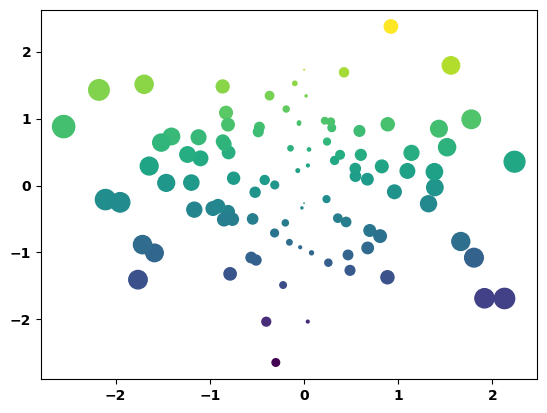

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));


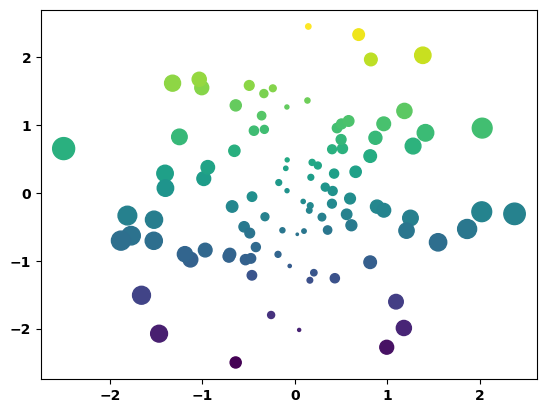

In [2]:
#hide-input
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));


### Some tags to use:

- hide, can be reavealed with a box to click
    - `hide-input`
    - `hide-output`
    - `hide-cell`
- remove, can't be seen
    - `remove-input`
    - `remove-output`
    - `remove-cell`

## Create a virtual environment

Some references:
- [Adding custom kernels to a jupyter notebook in visual studio](https://srinivas1996kumar.medium.com/adding-custom-kernels-to-a-jupyter-notebook-in-visual-studio-53e4d595208c)
- [Installing using pip and virtual environments](https://packaging.python.org/en/latest/guides/installing-using-pip-and-virtual-environments/)
- [Managing virtual environment with pyenv](https://towardsdatascience.com/managing-virtual-environment-with-pyenv-ae6f3fb835f8)
- [Jupyter docs](https://docs.jupyter.org/en/latest/running.html)
- [Bisual studio Jupyter notebooks](https://code.visualstudio.com/docs/datascience/jupyter-notebooks)

In Windows I used Anaconda PowerShell. Go to folder where you want to install the virtual environment. May make sense to put them in the same place as any other ones (should be visible in visual code when a Python file is running or from Path), I use `anaconda3\envs`.

Create a new env called `new-env`:

`python -m venv new-env`

Activate it:

`.\new-env\Scripts\activate`

Once in the virtual env, can then install the packages needed:

```
pip install jupyter
pip install ipykernel
```

Then activate it:

`python -m ipykernel install --user --name new-env  --display-name "new-env"`

If you want to run Jupyter notebook run:

`jupyter notebook`

## An interactive plot example

In [3]:
import altair as alt
from vega_datasets import data

movies = alt.UrlData(
    data.movies.url,
    format=alt.DataFormat(parse={"Release_Date":"date"})
)
ratings = ['G', 'NC-17', 'PG', 'PG-13', 'R']
genres = ['Action', 'Adventure', 'Black Comedy', 'Comedy',
       'Concert/Performance', 'Documentary', 'Drama', 'Horror', 'Musical',
       'Romantic Comedy', 'Thriller/Suspense', 'Western']

base = alt.Chart(movies, width=200, height=200).mark_point(filled=True).transform_calculate(
    Rounded_IMDB_Rating = "floor(datum.IMDB_Rating)",
    Hundred_Million_Production =  "datum.Production_Budget > 100000000.0 ? 100 : 10",
    Release_Year = "year(datum.Release_Date)"
).transform_filter(
    alt.datum.IMDB_Rating > 0
).transform_filter(
    alt.FieldOneOfPredicate(field='MPAA_Rating', oneOf=ratings)
).encode(
    x=alt.X('Worldwide_Gross:Q', scale=alt.Scale(domain=(100000,10**9), clamp=True)),
    y='IMDB_Rating:Q',
    tooltip="Title:N"
)

# A slider filter
year_slider = alt.binding_range(min=1969, max=2018, step=1)
slider_selection = alt.selection_single(bind=year_slider, fields=['Release_Year'], name="Release Year_")


filter_year = base.add_selection(
    slider_selection
).transform_filter(
    slider_selection
).properties(title="Slider Filtering")

# A dropdown filter
genre_dropdown = alt.binding_select(options=genres)
genre_select = alt.selection_single(fields=['Major_Genre'], bind=genre_dropdown, name="Genre")

filter_genres = base.add_selection(
    genre_select
).transform_filter(
    genre_select
).properties(title="Dropdown Filtering")

#color changing marks
rating_radio = alt.binding_radio(options=ratings)

rating_select = alt.selection_single(fields=['MPAA_Rating'], bind=rating_radio, name="Rating")
rating_color_condition = alt.condition(rating_select,
                      alt.Color('MPAA_Rating:N', legend=None),
                      alt.value('lightgray'))

highlight_ratings = base.add_selection(
    rating_select
).encode(
    color=rating_color_condition
).properties(title="Radio Button Highlighting")

# Boolean selection for format changes
input_checkbox = alt.binding_checkbox()
checkbox_selection = alt.selection_single(bind=input_checkbox, name="Big Budget Films")

size_checkbox_condition = alt.condition(checkbox_selection,
                                        alt.SizeValue(25),
                                        alt.Size('Hundred_Million_Production:Q')
                                       )

budget_sizing = base.add_selection(
    checkbox_selection
).encode(
    size=size_checkbox_condition
).properties(title="Checkbox Formatting")

( filter_year | filter_genres) &  (highlight_ratings | budget_sizing  )

alt.VConcatChart(...)